In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import re
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
import datetime
warnings.filterwarnings('ignore')

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

In [36]:
final_df = pd.read_csv('final_df_07.csv').drop(columns='Unnamed: 0')

In [37]:
final_df.head(2)

,title,director,producer,importer,distributor,distributor_group,release_date,release_season,release,form,...,starring_actors,running_times,audience_rating,rating_audiences,realease_year,director_power,director_movie_num,sequel,original,actor_power
0,어벤져스: 에이지 오브 울트론,조스 웨던,NaN,월트디즈니컴퍼니코리아(주),월트디즈니컴퍼니코리아(주),B,4/23/2015,spring,개봉영화,장편,...,"로버트 다우니 주니어,크리스 헴스워스,마크 러팔로",141,8.612377,5268,2015,17567536.0,1 [1],1,0,542407997
1,국제시장,윤제균,"(주)제이케이필름,씨제이이앤엠(주)",NaN,씨제이이앤엠(주),A,12/17/2014,winter,개봉영화,장편,...,"황정민,김윤진,오달수",126,9.272091,1143,2014,5334561.0,1 [1],0,0,608444941


In [41]:
final_df.iloc[0]

title                            어벤져스: 에이지 오브 울트론
director                                    조스 웨던
producer                                      NaN
importer                           월트디즈니컴퍼니코리아(주)
distributor                        월트디즈니컴퍼니코리아(주)
distributor_group                               B
release_date                            4/23/2015
release_season                             spring
release                                      개봉영화
form                                           장편
nation                                         미국
screen                                       1843
rev_nationwide                        8.85826e+10
aud_nationwide                           10494499
rev_seoul                             25001906266
rev_seoul.1                               2823388
genre                                          액션
rate                                     12세이상관람가
type                                         일반영화
expert_rating                                6.92


In [104]:
# final_df.info()

In [42]:
X = final_df.drop(columns=['aud_nationwide'])
y = final_df['aud_nationwide']

In [107]:
final_df = final_df.drop(columns=['producer', 'importer'])

In [112]:
final_df = final_df.dropna()

In [154]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 927
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               925 non-null    object 
 1   director            925 non-null    object 
 2   distributor         925 non-null    object 
 3   distributor_group   925 non-null    object 
 4   release_date        925 non-null    object 
 5   release_season      925 non-null    object 
 6   release             925 non-null    object 
 7   form                925 non-null    object 
 8   nation              925 non-null    object 
 9   screen              925 non-null    int64  
 10  rev_nationwide      925 non-null    float64
 11  aud_nationwide      925 non-null    int64  
 12  rev_seoul           925 non-null    int64  
 13  rev_seoul.1         925 non-null    int64  
 14  genre               925 non-null    object 
 15  rate                925 non-null    object 
 16  type    

In [148]:
len(final_df)

925

In [115]:
final_df.to_csv('final_df_08.csv')

In [122]:
len(final_df.columns)

28

In [118]:
X = final_df.drop(columns='aud_nationwide')
y = final_df['aud_nationwide']

In [131]:
len(X_train)+len(X_test)

925

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [132]:
X_train.to_csv('X_train_08_1.csv')
y_train.to_csv('y_train_08_1.csv')

In [133]:
X_test.to_csv('X_test_08_1.csv')
y_test.to_csv('y_test_08_1.csv')

#  train 데이터셋으로 회귀분석 시작하기
- X_train, y_train

In [137]:
X_train.head(1)

,title,director,distributor,distributor_group,release_date,release_season,release,form,nation,screen,...,starring_actors,running_times,audience_rating,rating_audiences,realease_year,director_power,director_movie_num,sequel,original,actor_power
107,인사이드 아웃,피트 닥터,월트디즈니컴퍼니코리아(주),B,7/9/2015,summer,개봉영화,장편,미국,777,...,"에이미 포엘러,필리스 스미스,민디 캘링",102,9.113006,938,2015,4968687.0,1 [1],0,0,14906061


In [138]:
total_df = pd.concat([X_train, y_train], axis=1)

In [157]:
total_df.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power',
       'director_movie_num', 'sequel', 'original', 'actor_power',
       'aud_nationwide'],
      dtype='object')

In [158]:
X = total_df.drop(columns=['title', 'director', 'distributor', 'release_date', 'release', 'form', 'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'type', 'starring_actors', 'realease_year', 'director_movie_num', 'aud_nationwide'])
y = total_df['aud_nationwide']


## 변수명 df를 분석용 데이터프레임으로 쓴다
- X_train + y_train

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [166]:
len(X_train), len(y_train), len(X_test), len(y_test)

(592, 592, 148, 148)

In [169]:
X_train.columns

Index(['distributor_group', 'release_season', 'nation', 'screen', 'genre',
       'rate', 'expert_rating', 'running_times', 'audience_rating',
       'rating_audiences', 'director_power', 'sequel', 'original',
       'actor_power'],
      dtype='object')

In [170]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 276 to 881
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distributor_group  592 non-null    object 
 1   release_season     592 non-null    object 
 2   nation             592 non-null    object 
 3   screen             592 non-null    int64  
 4   genre              592 non-null    object 
 5   rate               592 non-null    object 
 6   expert_rating      592 non-null    float64
 7   running_times      592 non-null    int64  
 8   audience_rating    592 non-null    float64
 9   rating_audiences   592 non-null    int64  
 10  director_power     592 non-null    float64
 11  sequel             592 non-null    int64  
 12  original           592 non-null    int64  
 13  actor_power        592 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 69.4+ KB


In [100]:
# C(sequel), C(original)

In [171]:
df = pd.concat([X_train, y_train], axis=1)

In [87]:
import statsmodels.api as sm

In [173]:
model = sm.OLS.from_formula("aud_nationwide ~ distributor_group + release_season + nation + genre + rate + C(sequel) + C(original) + screen + expert_rating + audience_rating + running_times + rating_audiences + director_power + actor_power", data=df)
result = model.fit()


In [174]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     49.47
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          1.04e-148
Time:                        16:23:46   Log-Likelihood:                -9004.1
No. Observations:                 592   AIC:                         1.808e+04
Df Residuals:                     555   BIC:                         1.824e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
# 조건수가 너무 크다. 두가지 경우 예상가능
# 1. 스케일링 안해서 발생하는 문제
# 2. 다중공선성의 문제 -> 상관관계가 큰 독립변수 컬럼이 섞여있다

In [181]:
X_train.describe().loc["std"] # 독립변수 표준편차들의 단위크기가 각 컬럼별로 너무 제각각의 크기를 가지고있음

screen              4.208488e+02
expert_rating       2.019617e+00
running_times       1.960661e+01
audience_rating     1.503609e+00
rating_audiences    1.496466e+03
director_power      1.502832e+07
sequel              4.960602e-01
original            4.528205e-01
actor_power         1.497589e+08
Name: std, dtype: float64

In [179]:
# 카테고리 더미변수는 스케일링 하지 말고, 다른 수치형만 스케일링 한다

In [187]:
feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(sequel)', 'C(original)']
model2 = sm.OLS.from_formula("aud_nationwide ~ " + "+".join(feature_names), data=df)
result2 = model2.fit()
print(result2.summary())


                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     49.47
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          1.04e-148
Time:                        17:11:48   Log-Likelihood:                -9004.1
No. Observations:                 592   AIC:                         1.808e+04
Df Residuals:                     555   BIC:                         1.824e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [196]:
# 카테고리 변수의 기준 상수항 
# distributor_group : A
# release_season : autumn
# nation : 기타`
# genre : SF
# rate : 12세이상관람가
# sequel : 0
# original : 0


In [ ]:
# model2에서의 귀무가설 수용 변수
# sequel, audience_rating, director_power

In [198]:
# 부분회귀 플롯으로 독립변수들이 종속변수에 미치는 순수한 영향력 확인하기

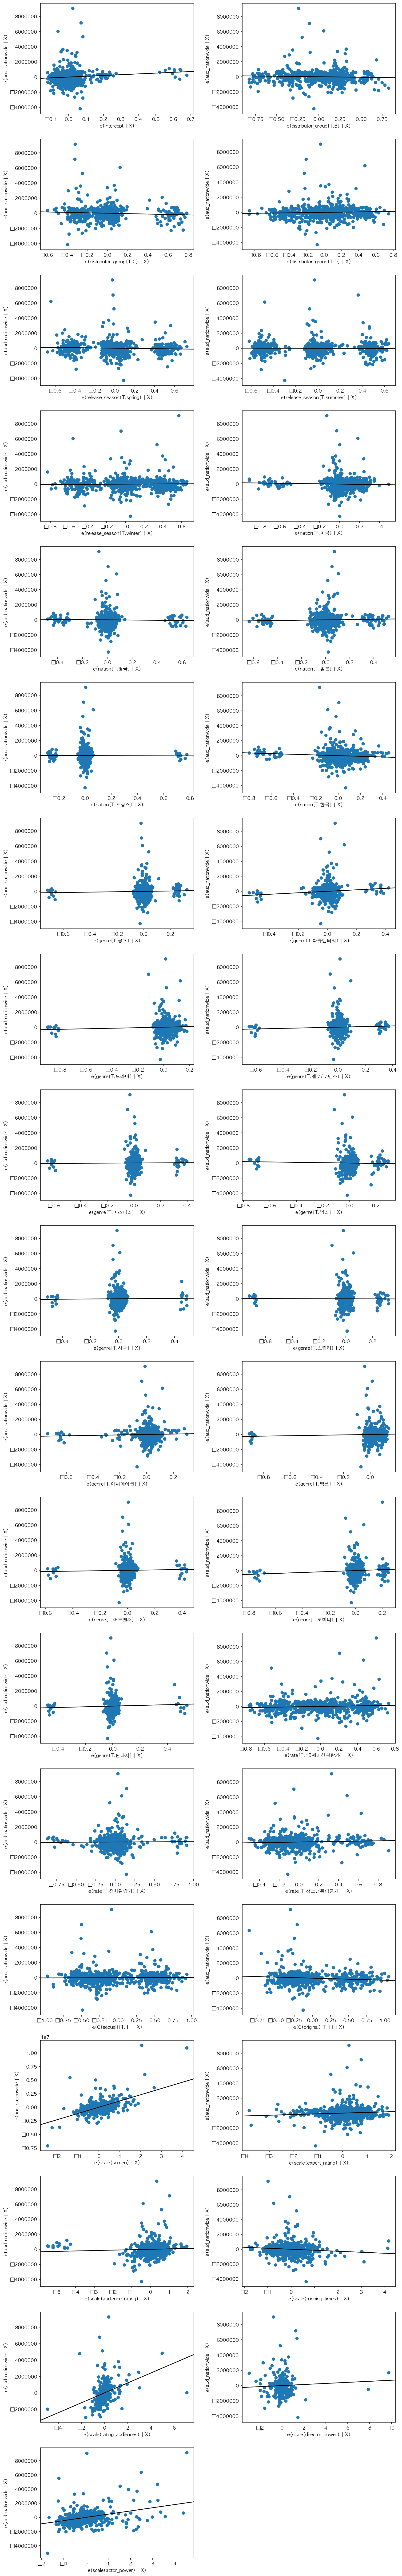

In [205]:
fig = plt.figure(figsize=(12, 80))
sm.graphics.plot_partregress_grid(result2, fig=fig)
fig.suptitle("")
plt.show()

In [206]:
# 쓸모없는 독립변수 
# 수치형 :
# 카테고리형 : sequel, 
# 미세한 기울기를 갖는 수치형 변수들은 log를 씌워보면 더 예측 성능이 좋아질까?


In [244]:
print(result2.t_test("C(sequel)[T.1] = 0"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            3.2e+04   9.33e+04      0.343      0.732   -1.51e+05    2.15e+05


In [247]:
len(df.columns)

15

In [248]:
df3 = df.drop(columns=['sequel'])
len(df3.columns)

14

In [249]:
feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
model3 = sm.OLS.from_formula("aud_nationwide ~ " + "+".join(feature_names), data=df3)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     50.96
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          1.53e-149
Time:                        19:53:07   Log-Likelihood:                -9004.2
No. Observations:                 592   AIC:                         1.808e+04
Df Residuals:                     556   BIC:                         1.824e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [252]:
# distributor_group, release_season, rate의 구분경계에 대한 유의미성 판단하기

In [295]:
#distributor_group

print(result3.t_test("distributor_group[T.B] = distributor_group[T.C]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.451e+05   1.68e+05      0.863      0.388   -1.85e+05    4.75e+05


In [270]:
# release_season

print(result3.t_test("release_season[T.summer] = release_season[T.winter]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -8.741e+04   1.18e+05     -0.738      0.461    -3.2e+05    1.45e+05


In [276]:
# rate

print(result3.t_test("rate[T.15세이상관람가] = rate[T.청소년관람불가]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -5933.3528   1.49e+05     -0.040      0.968   -2.98e+05    2.86e+05


In [278]:
print(result3.t_test("rate[T.15세이상관람가] = rate[T.전체관람가]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.493e+05   2.03e+05      0.734      0.463    -2.5e+05    5.49e+05


In [ ]:
## distributor_group : B = C
## rate : 15세이상관람가 = 전체관람가
## rate : 청소년관람불가 = 전체관람가
## rate는 사실상 12세 이상 관람가냐 아니냐 하는 이진분류가 됨

In [287]:
len(df.columns)

15

In [354]:
df_copy = df.copy()

In [355]:
# df_copy['distributor_group'].unique()

In [356]:
# distributor_group 

df_copy['distributor_group'] = df_copy['distributor_group'].replace("B", "C")

In [357]:
df_copy['rate'].unique()

array(['12세이상관람가', '전체관람가', '15세이상관람가', '청소년관람불가'], dtype=object)

In [358]:
# rate

df_copy['rate'] = df_copy['rate'].replace("15세이상관람가", "전체관람가")

In [359]:
# rate

df_copy['rate'] = df_copy['rate'].replace("청소년관람불가", "전체관람가")

In [360]:
df_copy['release_season'].unique()

array(['winter', 'summer', 'autumn', 'spring'], dtype=object)

In [361]:
# release season

df_copy['release_season'] = df_copy['release_season'].replace("summer", "winter")

In [362]:
df_copy['nation'].unique()

array(['미국', '일본', '한국', '기타', '영국', '프랑스'], dtype=object)

In [363]:
# 국적 카테고리 축소
# t-test로 확인

# nation

print(result4.t_test("nation[T.일본] = nation[T.미국]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          3.393e+05   1.81e+05      1.875      0.061   -1.62e+04    6.95e+05


In [364]:
df_copy['nation'] = df_copy['nation'].replace("영국", "미국")

In [365]:
df_copy['nation'] = df_copy['nation'].replace("프랑스", "미국")

In [397]:
# 장르 카테고리 축소
# t-test로 확인

# genre

print(result4.t_test("genre[T.사극] = genre[T.스릴러]"))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1.141e+05   3.63e+05      0.314      0.753   -5.99e+05    8.27e+05


In [383]:
df_copy['genre'].unique()

array(['드라마', '멜로/로맨스', '액션', '애니메이션', '다큐멘터리', '공포', '범죄', '코미디', '사극',
       '어드벤처', '미스터리', '판타지', '스릴러', 'SF'], dtype=object)

In [386]:
df_copy2['genre'].unique()

array(['멜로/로맨스', '액션', '애니메이션', '다큐멘터리', '공포', '범죄', '코미디', '사극', '어드벤처',
       '미스터리', '판타지', '스릴러', 'SF'], dtype=object)

In [390]:
# df_copy = df_copy2.copy()

In [402]:
df_copy2 = df_copy.copy()

In [399]:
df_copy2['genre'] = df_copy2['genre'].replace("사극", "스릴러")

In [421]:
df4 = df_copy2.drop(columns=['sequel'])
len(df4.columns)

14

In [422]:
feature_names = ['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power']
feature_names = ["scale({})".format(name) for name in feature_names] + ['distributor_group', 'release_season', 'nation', 'genre', 'rate', 'C(original)']
model4 = sm.OLS.from_formula("aud_nationwide ~ " + "+".join(feature_names), data=df4)
result4 = model4.fit()
print(result4.summary())


                            OLS Regression Results                            
Dep. Variable:         aud_nationwide   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     64.20
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          2.59e-155
Time:                        15:15:56   Log-Likelihood:                -9005.2
No. Observations:                 592   AIC:                         1.807e+04
Df Residuals:                     563   BIC:                         1.820e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [429]:
# pred =  result.predict(X_test[['screen', 'expert_rating', 'audience_rating', 'running_times', 'rating_audiences', 'director_power', 'actor_power', 'distributor_group', 'release_season', 'nation', 'genre', 'rate', 'original']])
# rss = ((y_test - pred) ** 2).sum()
# tss = ((y_test - y_test.mean()) ** 2).sum()
# rsquared4 = 1 - rss/tss
# rsquared4



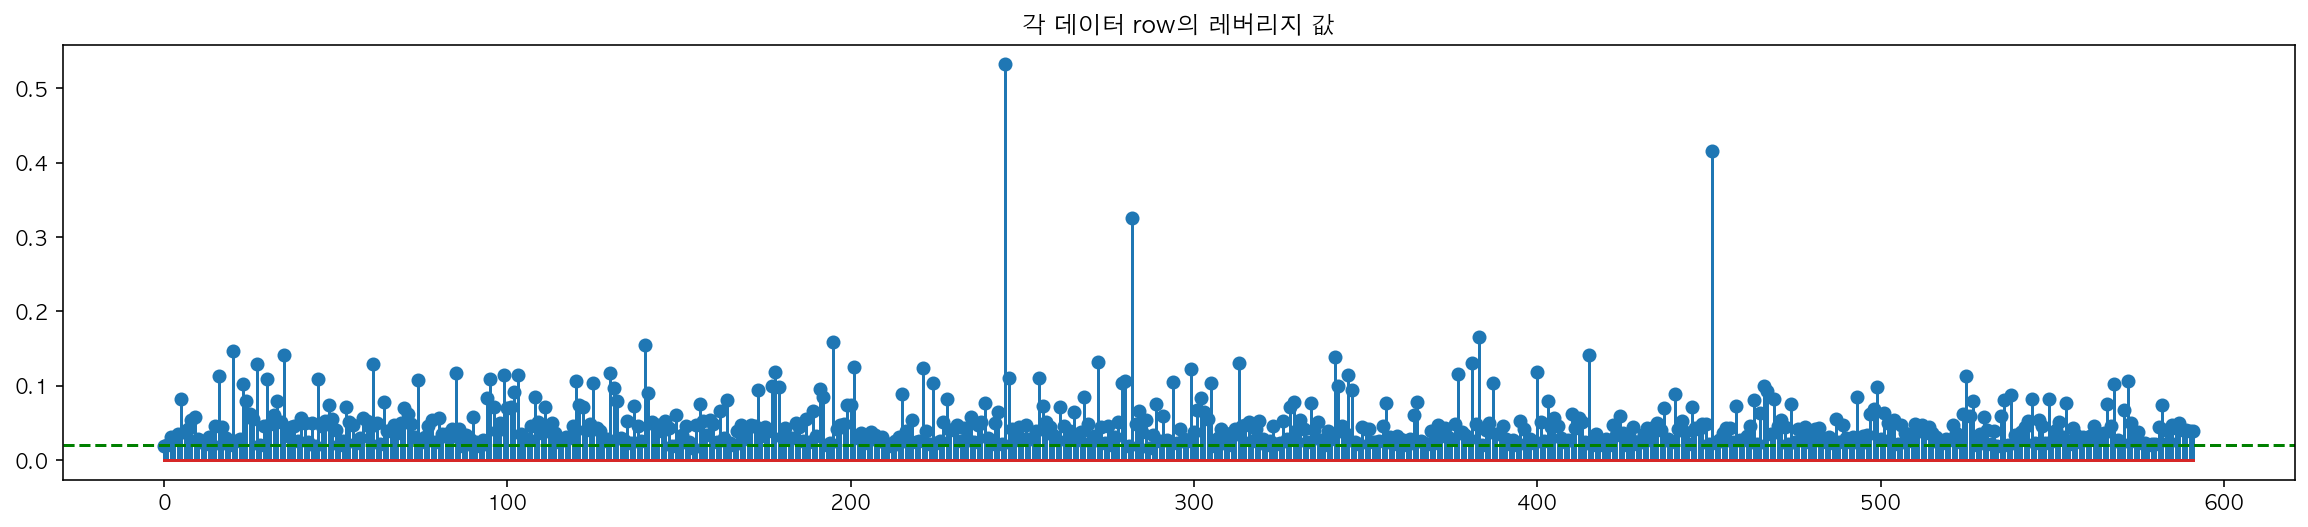

In [409]:
influence = result4.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(20, 4))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터 row의 레버리지 값")
plt.show()


In [411]:
# 레버리지 평균
14 / 592

0.02364864864864865

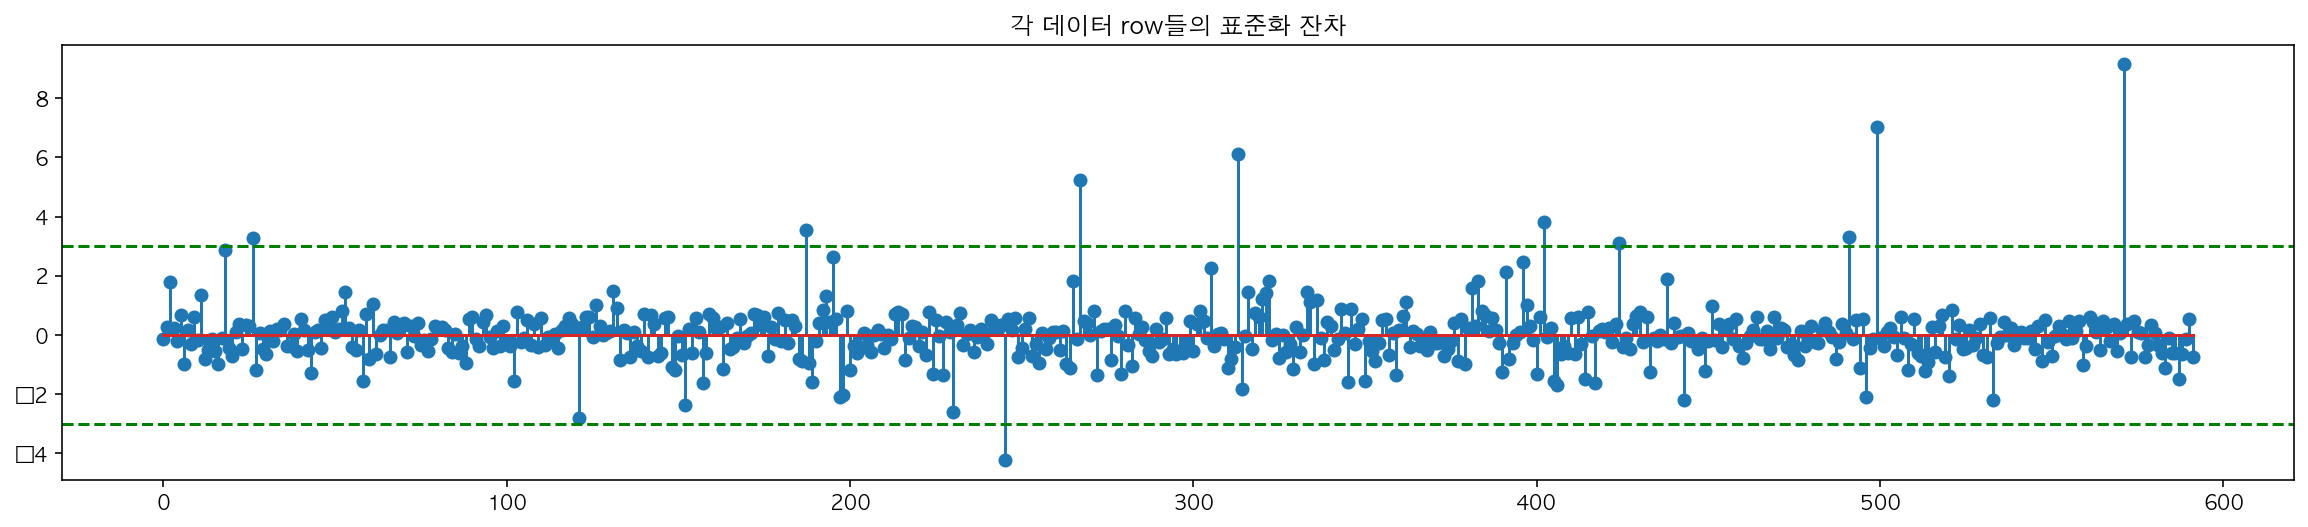

In [414]:
plt.figure(figsize=(20, 4))
plt.stem(result4.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터 row들의 표준화 잔차")
plt.show()

<Figure size 1440x720 with 0 Axes>

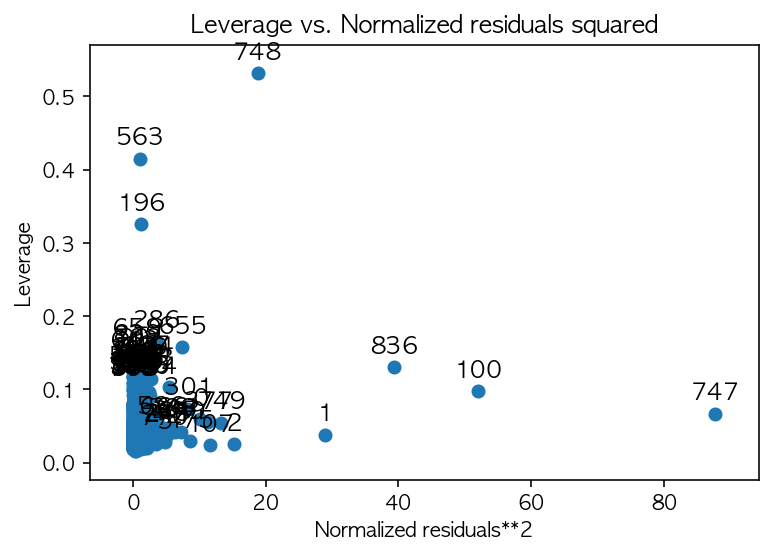

In [416]:
sm.graphics.plot_leverage_resid2(result4)
plt.show()

In [418]:
df4.corr()

,screen,expert_rating,running_times,audience_rating,rating_audiences,director_power,original,actor_power,aud_nationwide
screen,1.000000,0.232744,0.391941,0.154679,0.632760,0.496328,0.232477,0.488447,0.783863
expert_rating,0.232744,1.000000,0.448251,0.203631,0.188945,0.137441,-0.043751,0.147547,0.231089
running_times,0.391941,0.448251,1.000000,0.175453,0.302972,0.255223,0.065877,0.288657,0.308942
audience_rating,0.154679,0.203631,0.175453,1.000000,0.138223,0.082764,0.066794,0.059594,0.168273
rating_audiences,0.632760,0.188945,0.302972,0.138223,1.000000,0.726037,0.171556,0.408479,0.726472
director_power,0.496328,0.137441,0.255223,0.082764,0.726037,1.000000,0.145090,0.283068,0.562292
original,0.232477,-0.043751,0.065877,0.066794,0.171556,0.145090,1.000000,-0.011565,0.117803
actor_power,0.488447,0.147547,0.288657,0.059594,0.408479,0.283068,-0.011565,1.000000,0.564895
aud_nationwide,0.783863,0.231089,0.308942,0.168273,0.726472,0.562292,0.117803,0.564895,1.000000


In [413]:
# ax = plt.subplot()
# plt.scatter(X0, y)
# sm.graphics.abline_plot(model_results=result4, ax=ax)

# idx = hat > 0.024
# plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
# plt.title("result4의 회귀분석 결과와 레버리지 포인트")
# plt.show()
